In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive/')
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab minipro 4 /Permodelan data Home Credit Indonesia/Data HCI/application_train.csv')
df = data[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','CODE_GENDER','FLAG_WORK_PHONE','CNT_CHILDREN','FLAG_MOBIL','TARGET']]
df.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,CODE_GENDER,FLAG_WORK_PHONE,CNT_CHILDREN,FLAG_MOBIL,TARGET
0,202500.0,24700.5,406597.5,351000.0,M,0,0,1,1
1,270000.0,35698.5,1293502.5,1129500.0,F,0,0,1,0
2,67500.0,6750.0,135000.0,135000.0,M,1,0,1,0
3,135000.0,29686.5,312682.5,297000.0,F,0,0,1,0
4,121500.0,21865.5,513000.0,513000.0,M,0,0,1,0


In [ ]:
df.isnull().sum()

AMT_INCOME_TOTAL      0
AMT_ANNUITY          12
AMT_CREDIT            0
AMT_GOODS_PRICE     278
CODE_GENDER           0
FLAG_WORK_PHONE       0
CNT_CHILDREN          0
FLAG_MOBIL            0
TARGET                0
dtype: int64

In [ ]:
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median())
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median())

In [ ]:
df.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,CODE_GENDER,FLAG_WORK_PHONE,CNT_CHILDREN,FLAG_MOBIL,TARGET
0,202500.0,24700.5,406597.5,351000.0,M,0,0,1,1
1,270000.0,35698.5,1293502.5,1129500.0,F,0,0,1,0
2,67500.0,6750.0,135000.0,135000.0,M,1,0,1,0
3,135000.0,29686.5,312682.5,297000.0,F,0,0,1,0
4,121500.0,21865.5,513000.0,513000.0,M,0,0,1,0


In [ ]:
scaler= StandardScaler()
df[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN']] = scaler.fit_transform(df[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN']])

In [ ]:
label= LabelEncoder()
df['CODE_GENDER'] = label.fit_transform(df['CODE_GENDER'])

In [ ]:
df['TARGET'] = df['TARGET'] == 1
x = df[[col for col in df.columns if col != 'TARGET']].values
y = df['TARGET']

X_smote, y_smote = SMOTE(random_state=42).fit_resample(x, y)

Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.90      0.90    282686
        True       0.90      0.89      0.90    282686

    accuracy                           0.90    565372
   macro avg       0.90      0.90      0.90    565372
weighted avg       0.90      0.90      0.90    565372

Confusion MatriX:
 [[255660  27026]
 [ 30821 251865]]


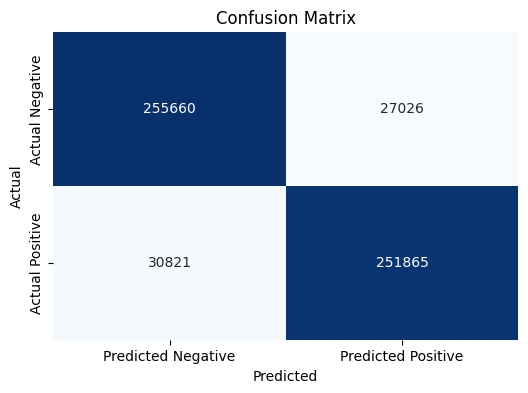

In [ ]:
# @title Random Forest Classifier dengan data feature logistik
X_train_ = X_smote
y_train_ = y_smote

# Disini saya melakukan training keseluruh data Train dengan K-Fold
random = RandomForestClassifier(criterion ='gini', n_estimators= 100, max_depth=50, random_state=42)
random.fit(X_train_,y_train_)
y_pred_ = cross_val_predict(random, X_train_, y_train_, cv=5)

# Menghitung Classification Report untuk metrik lainnya
cr = classification_report(y_train_, y_pred_)
print('Classification Report:\n',cr)

# Menghitung Confusion Matrik
cm = confusion_matrix(y_train_,y_pred_)
print('Confusion MatriX:\n',cm)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=( 6 ,4 ))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

# Misalnya model Anda bernama 'trained_model'
joblib.dump(random, 'random_hci.pkl')
print("Model saved to 'random_hci.pkl'")

Model saved to 'random_hci.pkl'
